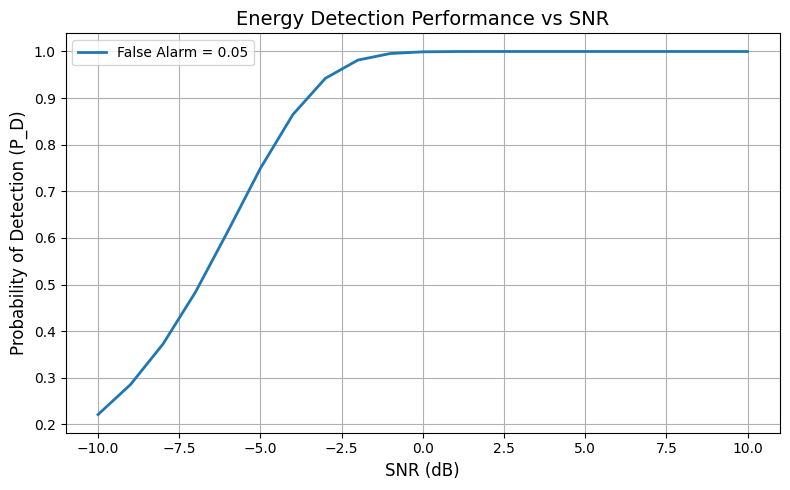

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -----------------------------
# 1. Detection parameters
# -----------------------------
N = 128                  # Number of signal samples per detection window
sigma2 = 1.0             # Noise power (normalized). In real systems, sigma2 = k*T*B
snr_db = np.arange(-10, 11, 1)  # SNR range in dB: from -10 dB to +10 dB
snr_linear = 10 ** (snr_db / 10)  # Convert SNR to linear scale
P_s = snr_linear * sigma2        # Signal power at different SNRs

# -----------------------------
# 2. Set target false alarm rate
# -----------------------------
P_FA = 0.05  # Desired probability of false alarm (e.g., 5%)

# -----------------------------
# 3. Compute detection threshold from P_FA
# -----------------------------
# Under H0: E ~ N(sigma^2, 2*sigma^4/N)
tau = sigma2 + np.sqrt(2 * sigma2**2 / N) * norm.ppf(1 - P_FA)

# -----------------------------
# 4. Compute theoretical probability of detection P_D at each SNR
# -----------------------------
# Under H1: E ~ N(sigma^2 + P_s, 2*(sigma^2 + P_s)^2/N)
std_H1 = np.sqrt(2 * (sigma2 + P_s)**2 / N)
mu_H1 = sigma2 + P_s
P_D = norm.sf((tau - mu_H1) / std_H1)  # Q-function of normalized distance

# -----------------------------
# 5. Plot P_D vs SNR
# -----------------------------
plt.figure(figsize=(8, 5))
plt.plot(snr_db, P_D, label=f'False Alarm = {P_FA}', linewidth=2)
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('Probability of Detection (P_D)', fontsize=12)
plt.title('Energy Detection Performance vs SNR', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
